['James', 'Camry']
<class 'networkx.classes.reportviews.NodeView'>
{'James': 'James: Person', 'Camry': 'Camry: Car'}


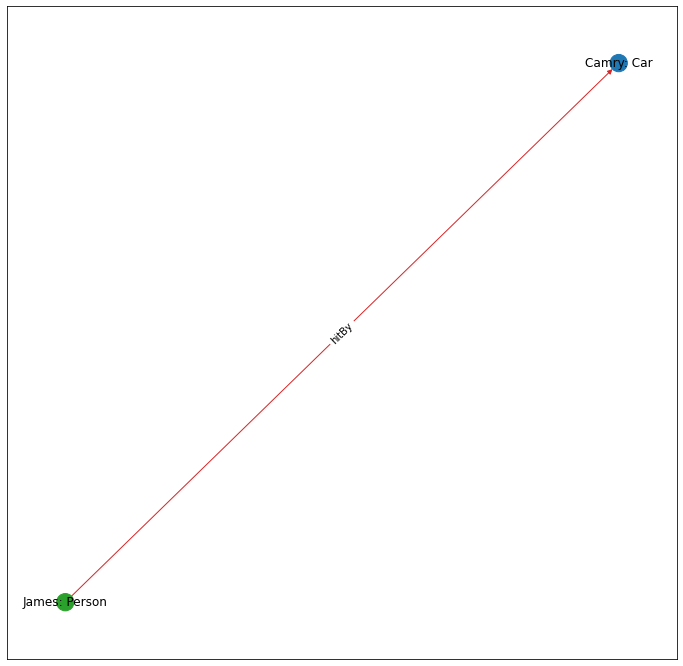

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_labeled_net(G: nx.DiGraph):
    plt.figure(figsize = (12,12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color = get_node_colors(G))
    nx.draw_networkx_labels(G, pos, labels = get_node_labels(G), font_size = 12)
    nx.draw_networkx_edges(G, pos, edge_color = 'tab:red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = get_edge_labels(G))
    plt.show()
                           
def get_node_labels(G: nx.DiGraph):
    labels = {}
    for i in range(len(G.nodes)):
        node_name = list(G.nodes)[i]
        try:
            labels[node_name] = f"{node_name}: {G.nodes[node_name]['data']['label']}"
        except KeyError as e:
            labels[node_name] = 'None'
    print(labels)
    return labels
            
def get_edge_labels(G: nx.DiGraph):
    edge_labels = {}
    for edge in list(G.edges):
        try:
            edge_labels[edge] = G.get_edge_data(*edge)['label']
        except KeyError as e:
            edge_labels[edge] = 'None'
    return edge_labels
            
def get_node_colors(G: nx.DiGraph):
    colors = []
    for i in range(len(G.nodes)):
        node_name = list(G.nodes)[i]
        try:
            colors.append(f"tab:{G.nodes[node_name]['data']['color']}")
        except KeyError as e:
            colors.append('tab:red')
    return colors       

G = nx.DiGraph()
G.add_node('James', data = {'color': 'green', 'label': 'Person'})
G.add_node('Camry', data = {'color': 'blue', 'label': 'Car'})
print(G.nodes)
print(type(G.nodes))
G.add_edge('James', 'Camry', label = 'hitBy')

draw_labeled_net(G)